**Warning:** This puzzle contains total spoilers for the 2017 MIT Mystery Hunt Puzzle "Chromesthesia"!

This year's [MIT Mystery Hunt](mit mystery hunt) was a fun one (and my team won, too!). But it was also the shortest Hunt in at least a decade, and with our team's large size, that meant that most of us saw only a fraction of the Hunt's puzzles. Fortunately, all the puzzles from this year's Hunt (and every past year, too) are available in the [hunt archives](http://www.mit.edu/~puzzle/huntsbyyear.html). What follows is one of my favorite puzzles from this year's Mystery Hunt, one which my girlfriend Michele and I only got to work on several days after Hunt ended. This puzzle is a great example of the kind of complex, technical, detailed puzzles that make Mystery Hunt great, and it was also a fun opportunity to practice solving puzzles in Julia, my favorite new programming language. 

### Aside: What's Julia?

For the past year or so, I've been doing at least some of my research using [Julia](http://julialang.org), a relatively new programming language with a lot to offer. Julia is fast (it can be as fast as C or Fortran), but also has a lot of the expressiveness and simplicity of Python. It's also been designed to be a good language for scientific computing (which means things like multidimensional arrays and linear algebra baked-in) but also a nice tool for general programming (which means a great ecosystem of packages for all kinds of purposes). Here, I'm going to use Julia's excellent [Images.jl](https://github.com/timholy/Images.jl) image library. 

# Anyway, the puzzle...

This puzzle was titled ["Chromesthesia"](http://solutions.monsters-et-manus.com/hunt/puzzle/chromesthesia.html), and it consisted of a single image:

![](image01.png)

also included in the puzzle was a message:

> One of the minstrels tells you that he was born with the unusual abilities to see things in total darkness and to hear colors as sounds.

That's all. With those two pieces of information, we have all we need to solve the puzzle. Let's go through the process of figuring it all out...

# Identifying the names

The image clearly consists of people's names, written in a variety of colors. It's not clear what the colors indicate yet (that's coming later), but at least we can identify the people. Some basic googling will tell you that these are all actors, and that the names listed are their *birth* names, not necessarily the names by which they're commonly known. For example, Colin Lewes Dillingham is now named Colin Hanks (after his dad, actor Tom). 

But identifying these people doesn't really tell us much. There must be something more to this puzzle. Time to start looking more carefully at that image...

# Puzzling with Julia

The first thing we need to do is import a few packages. If you don't have these installed, you can get them by running (in Julia):

    Pkg.add("Images")
    Pkg.add("ColorTypes")

In [1]:
using Images
using ColorTypes

Now we can load the image:

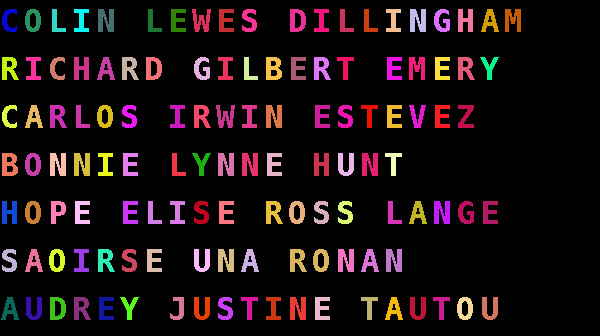

In [2]:
img = load("image01.png")

The image is automatically displayed inside this Jupyter notebook. That happens because an Image in Julia is actually represented by an array of some kind of `Color` type (from the `ColorTypes` package). Julia knows how to draw a single Color type (for example, RGB):

In [3]:
RGB(1, 0, 0)

And Julia knows how to draw a matrix of color types:

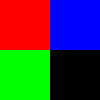

In [4]:
[RGB(1, 0, 0) RGB(0, 1, 0);
 RGB(0, 0, 1) RGB(0, 0, 0)]

An `Image` in Julia is just a matrix of colors with some additional metadata:

In [5]:
show(img)

RGB Images.Image with:
  data: 600×336 Array{ColorTypes.RGB{FixedPointNumbers.UFixed{UInt16,16}},2}
  properties:
    colorspace: RGB
    imagedescription: <suppressed>
    spatialorder:  x y
    pixelspacing:  1 1

Using actual data types to represent colors makes it easy to avoid the kind of indexing mistakes that I've often made in Matlab or Python. For example, an RGB image in Python's PIL library is represented as a 3-dimensional array. But what's the shape of that array? I'm pretty sure color is the third dimension, but is the order of that dimension [red, green, blue] or [blue, green, red]? I actually don't remember. 

In Julia, you don't have to remember. If you have a pixel, you can get its red value with the `red()` function:

In [6]:
pixel = RGB(0.1, 0.2, 0.3)
red(pixel)

0.1

And if you have an image, you can get a copy of its entire red channel with the same function, applied elementwise:

In [7]:
red.(img)

600×336 Array{FixedPointNumbers.UFixed{UInt16,16},2}:
 UFixed{UInt16,16}(0.0)  …  UFixed{UInt16,16}(0.0)    
 UFixed{UInt16,16}(0.0)     UFixed{UInt16,16}(0.00391)
 UFixed{UInt16,16}(0.0)     UFixed{UInt16,16}(0.00391)
 UFixed{UInt16,16}(0.0)     UFixed{UInt16,16}(0.00391)
 UFixed{UInt16,16}(0.0)     UFixed{UInt16,16}(0.00391)
 UFixed{UInt16,16}(0.0)  …  UFixed{UInt16,16}(0.00391)
 UFixed{UInt16,16}(0.0)     UFixed{UInt16,16}(0.0)    
 UFixed{UInt16,16}(0.0)     UFixed{UInt16,16}(0.0)    
 UFixed{UInt16,16}(0.0)     UFixed{UInt16,16}(0.0)    
 UFixed{UInt16,16}(0.0)     UFixed{UInt16,16}(0.0)    
 UFixed{UInt16,16}(0.0)  …  UFixed{UInt16,16}(0.0)    
 UFixed{UInt16,16}(0.0)     UFixed{UInt16,16}(0.0)    
 UFixed{UInt16,16}(0.0)     UFixed{UInt16,16}(0.0)    
    ⋮                    ⋱     ⋮                      
 UFixed{UInt16,16}(0.0)     UFixed{UInt16,16}(0.0)    
 UFixed{UInt16,16}(0.0)     UFixed{UInt16,16}(0.0)    
 UFixed{UInt16,16}(0.0)  …  UFixed{UInt16,16}(0.0)    
 UFixed{UIn

If we want to view that red channel as an image, we just have to tell Julia to use each red value as a grayscale color:

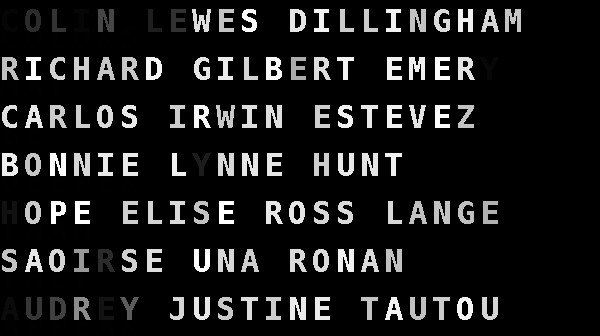

In [8]:
Gray.(red.(img))

Now that we have the basic tools, we can start exploring this image to see if there's more to it than meets the eye. First, let's look at the three color channels individually. The red channel (above) wasn't too surprising, but let's check blue and green:

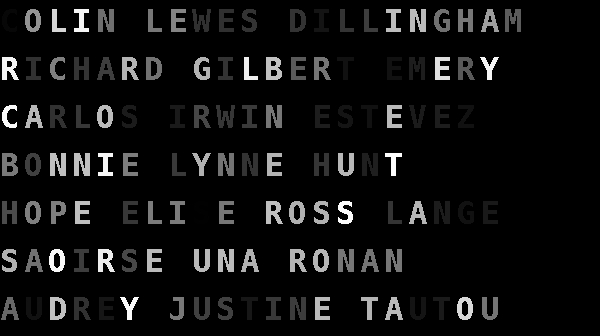

In [9]:
Gray.(green.(img))

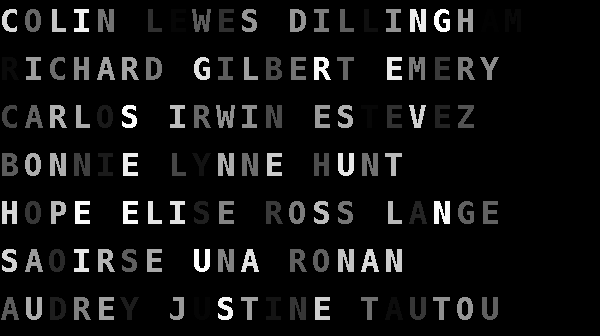

In [10]:
Gray.(blue.(img))

I don't see anything out of the ordinary. Let's try another representation  of the image. 

This image is currently encoded as RGB, meaning that each pixel specifies its color as an amount of red, green, and blue. Another common way of specifiying colors is hue, saturation, value (HSV). The *hue* component roughly tells us the kind of color (red or green or blue or yellow, etc.), the *saturation* tells us how strong that color is, and the *value* tells us how bright the color is. 

Julia's Images package knows how to convert an image to HSV:

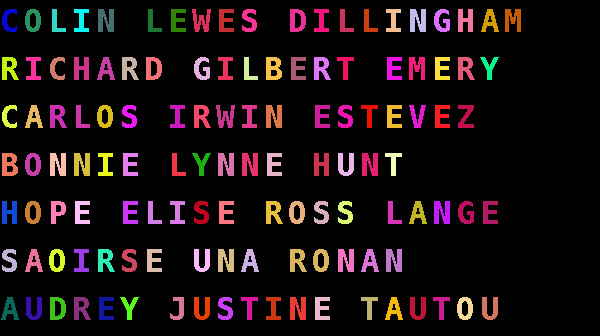

In [11]:
img_hsv = convert(Image{HSV}, img)

That doesn't look any different. That's not surprising: HSV and RGB are just two different ways of encoding the same colors, and Julia knows how to draw an HSV pixel just like it knows how to draw an RGB pixel. 

But now that we've converted the image, we can look at the H, S, and V channels individually. 

First, let's define some helper functions:

In [12]:
hue(pixel::ColorTypes.HSV) = pixel.h
saturation(pixel::ColorTypes.HSV) = pixel.s
value(pixel::ColorTypes.HSV) = pixel.v

value (generic function with 1 method)

We only need to define our hue, saturation, and value functions for individual pixels, not for an entire image. That's because Julia's native broadcasting abilities, which we invoke by using the `.()` syntax, will magically do the right thing and apply our pixel-by-pixel functions efficiently to the entire image. 

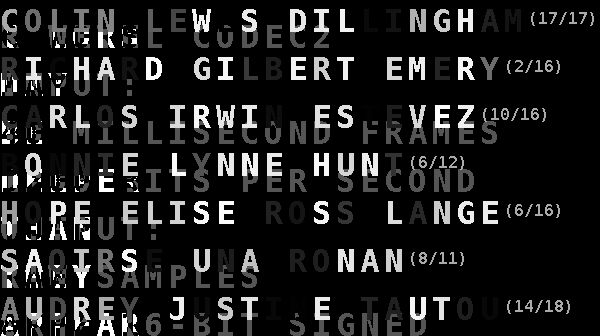

In [13]:
Gray.(hue.(img_hsv) ./ 360)

Whoa! When I first saw this, I assumed that I had screwed something up, or that I'd found a bug in Julia or in Images.jl. But no, there really is something visible in the hue channel that we couldn't see in the RGB image. Cool! 

In the above image, I can see some enumerations like `(17/17)` and `(2/16)`. Those are probably going to be used as indexes later on. But there's also something written below the names. It's hard to read, but I can clearly see `CODEC2` and `MILLISECOND FRAMES`. That sounds like an instruction of some kind. 

But it also looks like there's another message on top of that one. We need to clean up the signal...

So far, we've just looked at the hue. What can we see in the saturation? 

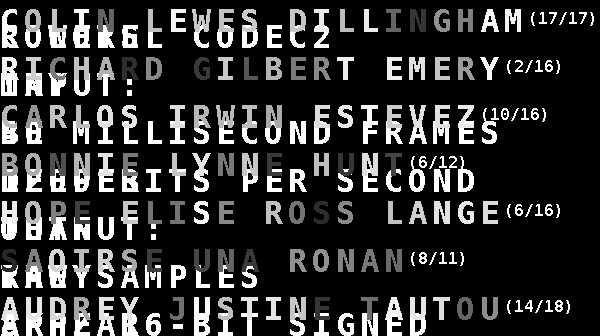

In [14]:
Gray.(saturation.(img_hsv))

That's different, but not realy any better. What about subtracting out the value component?

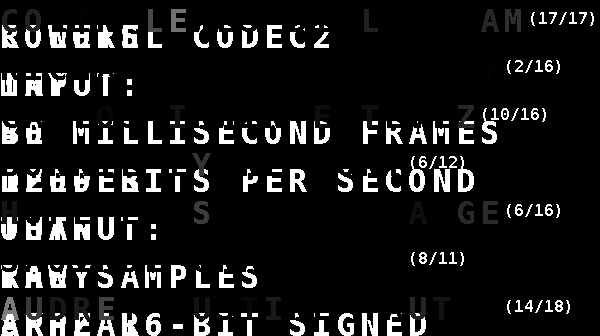

In [15]:
Gray.(max.(saturation.(img_hsv) .- value.(img_hsv), 0))

Again, different but not any better. 

The two messages still seem to be on top of each other. Maybe we can try splitting out just one of the color channels? We've already tried viewing the red, green, and blue channels as gray, but what if we just strip out those channels while keeping the image as RGB? 

We'll need some more helpers:

In [16]:
splitred(px::RGB) = RGB(red(px), 0, 0)
splitgreen(px::RGB) = RGB(0, green(px), 0)
splitblue(px::RGB) = RGB(0, 0, blue(px))

splitblue (generic function with 1 method)

Each of these helpers just returns a new image with only one color channel left:

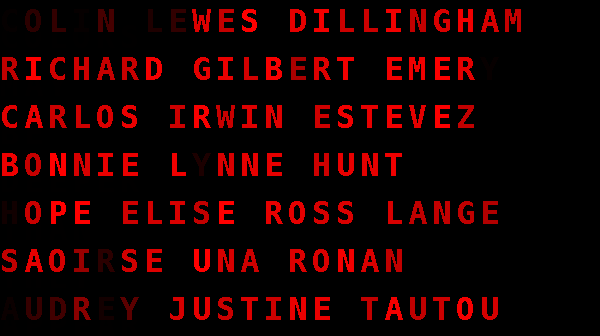

In [17]:
splitred.(img)

Now we can play around with just one channel at a time. Let's try the HSV trick again:

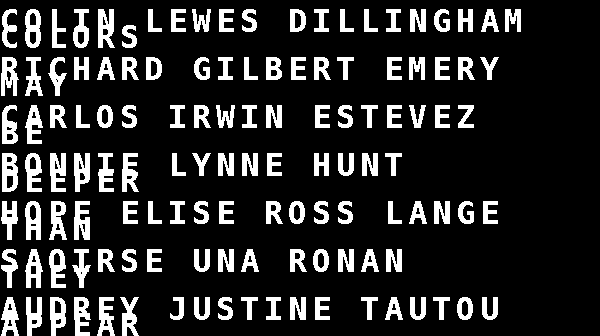

In [18]:
Gray.(hue.(convert(Image{HSV}, splitred.(img))) ./ 360)

Woohoo! We've finally split apart the secret message. This part says:

> colors may be deeper than they appear

I'm not sure what that means yet, but let's continue. How about the greens?

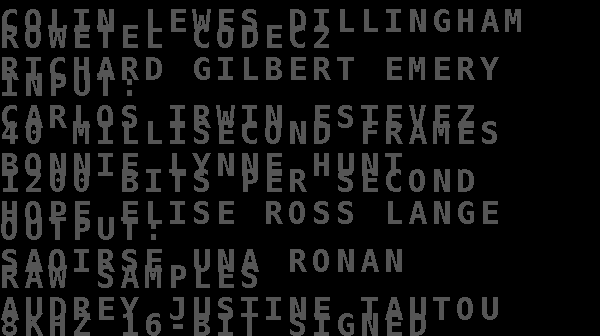

In [19]:
Gray.(hue.(convert(Image{HSV}, splitgreen.(img))) ./ 360)

Another message:

> rowetel codec2
> input:
> 40 millisecond frames
> 1200 bits per second
> output:
> raw-samples
> 8KHz 16-bit signed

More googling will reveal that this is a precise description of the inputs and outputs of a particular audio codec, one which is designed specifically to encode human speech with very small amounts of data. 

It's clear that the puzzle is telling us how to use that codec, but what is the input data? 

Well, the most obvious thing to try is: what if we just feed this image file directly into that audio codec? Maybe it'll sound like something? 

To do that, we'll need a few tools. I installed the `codec2` and `sox` packages from homebrew with:

    brew install codec2
    brew install sox

Now we can pass the image file into the `c2dec` program, which decodes `codec2` data, and then listen to the result with the `play` program (which was installed with `sox`). 

We'll use the Julia `pipeline()` command, which makes it easy to run external programs and pass the output of one to the input of the next:

In [ ]:
run(pipeline(
    `cat image01.png`,
    `c2dec 1200 - -`, 
    `play -t raw -r 8000 -e signed -b 16 -`))


-: (raw)

 File Size: 0         
  Encoding: Signed PCM    
  Channels: 1 @ 16-bit   
Samplerate: 8000Hz       
Replaygain: off         
  Duration: unknown      

In:0.00% 00:00:02.05 [00:00:00.00] Out:76.2k [-=====|=====-] Hd:0.4 Clip:0    

Doing that results in audio that sounds like this:

<audio src="image01.mp3" controls preload></audio>

To my ears that sounds a *lot* like speech, but it's impossible to understand. Michele and I spent a *long* time trying different settings and decoder programs, but could never get this audio to sound any better. 

After a while, we tried running the same conversion process on another image file (one that was definitely not a puzzle), and that result also sounded kind of like speech. It turns out that we should have expected that: `codec2` is designed to only encode human speech, so it throws out all kinds of information (for example, it discards the phase of the audio signal entirely). When a `codec2` file is played back, most of that information is reconstructed based on the *assumption* that the data is speech, so even random input will sound kind of like talking. 

That means we're not on the right track quite yet. What else can we try? 

Let's go back to that first message about the colors being "deeper than they appear". Deep color is a [thing](https://en.wikipedia.org/wiki/Color_depth#Deep_color_.2830.2F36.2F48-bit.29) and refers to colors with more than 8 bits per channel. This image file actually has 16 bits of data for each of the red, green, and blue values. We can see that in the image summary:

In [20]:
show(img)

RGB Images.Image with:
  data: 600×336 Array{ColorTypes.RGB{FixedPointNumbers.UFixed{UInt16,16}},2}
  properties:
    colorspace: RGB
    imagedescription: <suppressed>
    spatialorder:  x y
    pixelspacing:  1 1

Note that the pixel type is `RGB{UFixed{UInt16}}`. 

16 bits per color means that each pixel consists of exactly 16 * 3 = 48 bits. Now let's go back to the codec message. It said "40 millisecond frames" at "1200 bits per second". Multiplying those out gives 48 bits per frame, exactly the amount of data in a single color pixel. That's very suspicious! 

It looks like each letter in the image is all one color, but that each letter is different from every other letter. So let's gather up all of the  colors from one line of the image and then try to interpret them as audio.  This step might seem crazy, but the text that came with the puzzle mentioned hearing colors as sounds, so we're probably on the right track. 

To do this, we need to iterate through a single row of the image. Each pixel we see will either be black (in which case can ignore it) or part of a letter. If it's part of a letter, and it's not a color we've seen before, then we'll pull out the 48 bits of data from the red, green, and blue channels. Otherwise we'll just move on to the next pixel. 

We'll feed the pixels into this pipeline, which will decode them and then play the result:

In [21]:
decoder = pipeline(
    `c2dec 1200 - -`, 
    `play -t raw -r 8000 -e signed -b 16 -`)

pipeline(`c2dec 1200 - -`, stdout=`play -t raw -r 8000 -e signed -b 16 -`)

But how do we actually represent the 48 bits of data? Is it red, green, blue or blue, green, red? And each color is 16 bits, so do we write the higher 8 bits or the lower 8 bits first? 

It's probably possible to make a good guess, but there's really not that many options. Let's just try them all until something cool happens. 

First up: red, green, blue, writing the lower bits first:

In [22]:
open(decoder, "w") do f
    # row 10 is the first row that includes visible letters
    row = 10
    lastcolor = img[1,row]
    for p in img[:,row]
        if p == lastcolor || (red(p) == 0 && green(p) == 0 && blue(p) == 0)
            continue
        end
        lastcolor = p
        for color in (red, green, blue)
            write(f, reinterpret(UInt16, color(p)) % UInt8)
            write(f, (reinterpret(UInt16, color(p)) >> 8) % UInt8)
        end
    end
end


-: (raw)

 File Size: 0         
  Encoding: Signed PCM    
  Channels: 1 @ 16-bit   
Samplerate: 8000Hz       
Replaygain: off         
  Duration: unknown      

In:0.00% 00:00:00.80 [00:00:00.00] Out:35.3k [      |      ] Hd:0.0 Clip:0    
Done.


Nope, that sounds like garbage: 

<audio src="lowfirst.mp3" controls preload></audio>

Next up: red, green, blue, writing the higher bits first:

In [23]:
open(decoder, "w") do f
    row = 10
    lastcolor = img[1,row]
    for p in img[:,row]
        if p == lastcolor || (red(p) == 0 && green(p) == 0 && blue(p) == 0)
            continue
        end
        lastcolor = p
        for color in (red, green, blue)
            write(f, (reinterpret(UInt16, color(p)) >> 8) % UInt8)
            write(f, reinterpret(UInt16, color(p)) % UInt8)
        end
    end
end


-: (raw)

 File Size: 0         
  Encoding: Signed PCM    
  Channels: 1 @ 16-bit   
Samplerate: 8000Hz       
Replaygain: off         
  Duration: unknown      

In:0.00% 00:00:00.80 [00:00:00.00] Out:35.3k [      |      ] Hd:1.0 Clip:0    
Done.


And here's the result:

<audio src="highfirst.mp3" controls preload></audio>

It works!!! That's definitely speech, and it's definitely saying "soda". I can't overstate how excited I was when I finally got this result for the first time. That's the joy of puzzling in a nutshell. 

### Getting the Rest of the Message

Now we need to decode the rest of the letters. Each row of letters is separated by 48 pixels, and we just have to repeat our code for each row:

In [24]:
open(decoder, "w") do f
    for row in 10:48:size(img, 2)
        lastcolor = img[1,row]
        for p in img[:,row]
            if p == lastcolor || (red(p) == 0 && green(p) == 0 && blue(p) == 0)
                continue
            end
            lastcolor = p
            for color in (red, green, blue)
                write(f, (reinterpret(UInt16, color(p)) >> 8) % UInt8)
                write(f, reinterpret(UInt16, color(p)) % UInt8)
            end
        end
    end
end


-: (raw)

 File Size: 0         
  Encoding: Signed PCM    
  Channels: 1 @ 16-bit   
Samplerate: 8000Hz       
Replaygain: off         
  Duration: unknown      

In:0.00% 00:00:04.96 [00:00:00.00] Out:219k  [      |      ] Hd:0.1 Clip:0    
Done.


That produces a single audio stream with all of the color-to-audio results:

<audio src="combined.mp3" controls preload></audio>

That's it!! We've pulled actual speech out of just the colors of a few letters. The words are:

    soda
    raincoat
    umbrella
    pangea
    bandana
    affair
    children


# Solving the Puzzle

Now what? The next step involves some less technical puzzle-solving skills. Let's go back to those actors in the image and look at their IMDB pages. This puzzle is clearly about color, so maybe those actors have movies that involve colors? 

It turns out that every actor listed in the image has exactly one movie on his or her IMDB page with a color in the title. For example, Colin is in "Orange County", and Richard is in "Yellow Submarine". That give us:

| Movie | Color | Word from audio |
|--|--|--|
| Orange County | Orange | Soda |
| Yellow Submarine | Yellow | Raincoat |
| Red Dawn | Red | Umbrella |
| The Green Mile | Green | Pangea |
| Blue Velvet | Blue | Bandana |
| Violet & Daisy | Violet | Affair |
| Mood Indigo | Indigo | Children |

Each of the colors is one of the standard ROYGBIV rainbow colors, but there's more to notice. If you're a pop culture whiz (nope) or good with Google (yup), you might notice that each color + word combination is actually the title of a song, like "Orange Soda" by Vic Mensa or "Yellow Raincoat" by Justin Bieber. That seems pretty interesting...

It's finally time to look at the very last piece of information we got out of the image: the enumerations. Those are easiest to say if we apply the hue trick to the blue channel: 

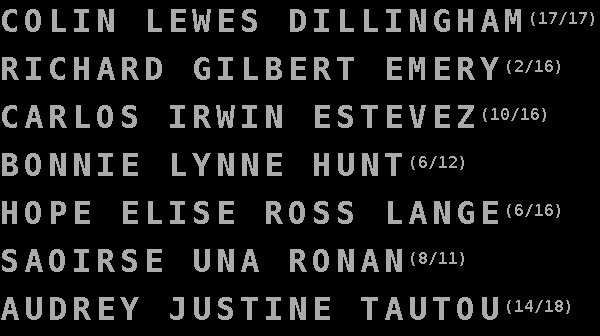

In [25]:
Gray.(hue.(convert(Image{HSV}, splitblue.(img))) ./ 360)

These numbers don't match the lengths of the songs or of the singers. But here's a question: why did the puzzle use the *birth* names of the actors? It's not hard to figure out that Colin Dillingham is Colin Hanks. Maybe it's a clue? 

It turns out that, for each song, if we take the *birth* name of the singer, it fits the corresponding enumeration exactly. For example, Vic Mensa was born Victor Kewsi Mensah (17 letters) and Justin Bieber is Justin Drew Bieber (16 letters). In each enumeration, the second number is the total length, so we can use the first number to take the corresponding letter from that full name. That gives:


| Movie | Color | Word from audio | Singer birth name | Index | Index into birth name |
|--|--|--|--|--|--|
| Orange County | Orange | Soda | victorkewsimensah | 17 | H |
| Yellow Submarine | Yellow | Raincoat | justindrewbieber | 2 | U |
| Red Dawn | Red | Umbrella | audreyfaithperry | 10 | T |
| The Green Mile | Green | Pangea | martenlaciny | 6 | N |
| Blue Velvet | Blue | Bandana | jerrodleeniemann | 6 | D |
| Violet & Daisy | Violet | Affair | helenmarnie | 8 | R |
| Mood Indigo | Indigo | Children | maynardjameskeenan | 14 | E |

Finally, we just have to put those letters in some better order. We have 7 songs with 7 rainbow colors, so let's try putting them in the order of the colors of the rainbow: 

| Color | Letter |
|--|--|
| red | T |
| orange | H |
| yellow | U |
| green | N | 
| blue | D |
| indigo | E |
| violet | R |

Now the letters spell out THUNDER. And that's the answer! 

This was a great puzzle. I learned a lot about audio encoding and image manipulation from solving it, and it had just enough clues to keep pushing me in the right direction. I hope you enjoyed the ride. 

For more puzzles, check out the Mystery Hunt archives at <http://www.mit.edu/~puzzle/huntsbyyear.html>